In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       276
           1       0.91      0.88      0.89        24

    accuracy                           0.98       300
   macro avg       0.95      0.93      0.94       300
weighted avg       0.98      0.98      0.98       300



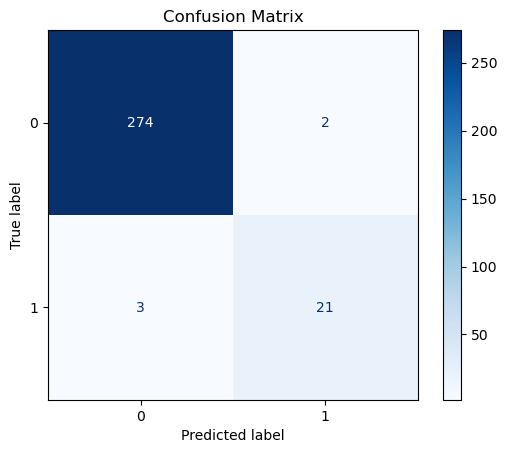

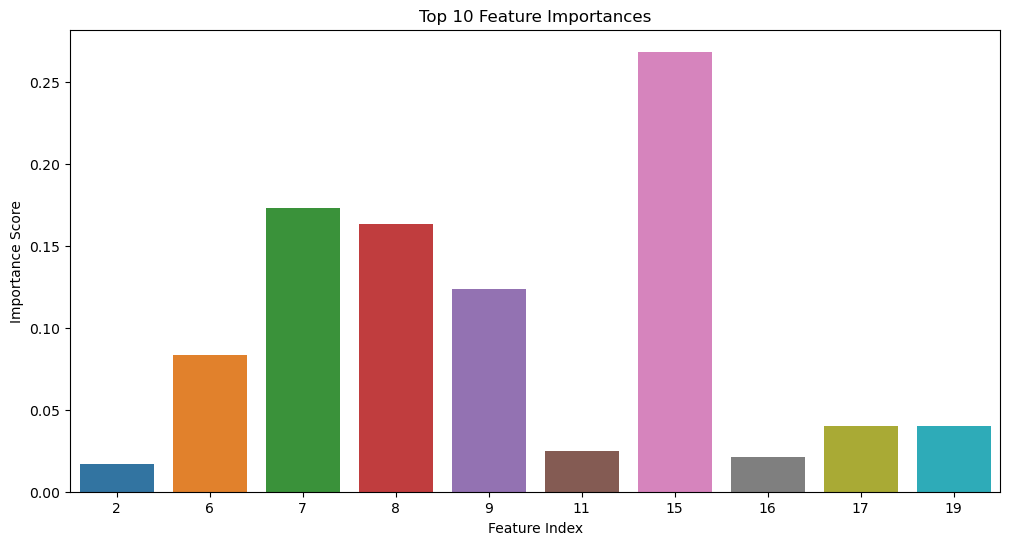

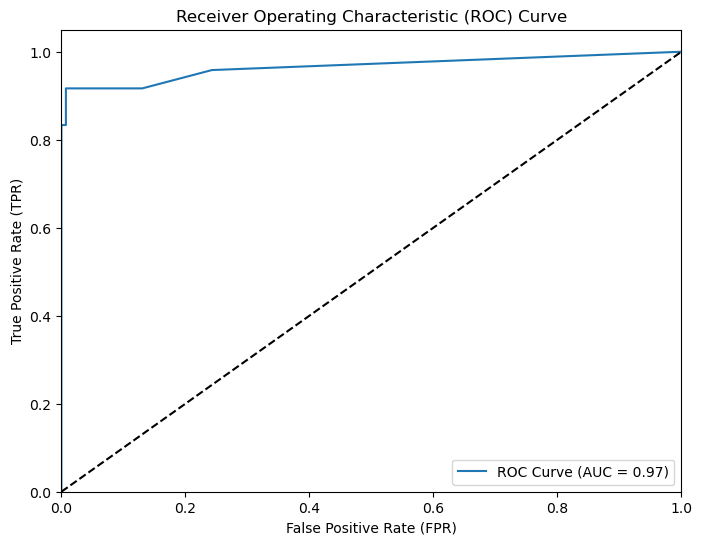

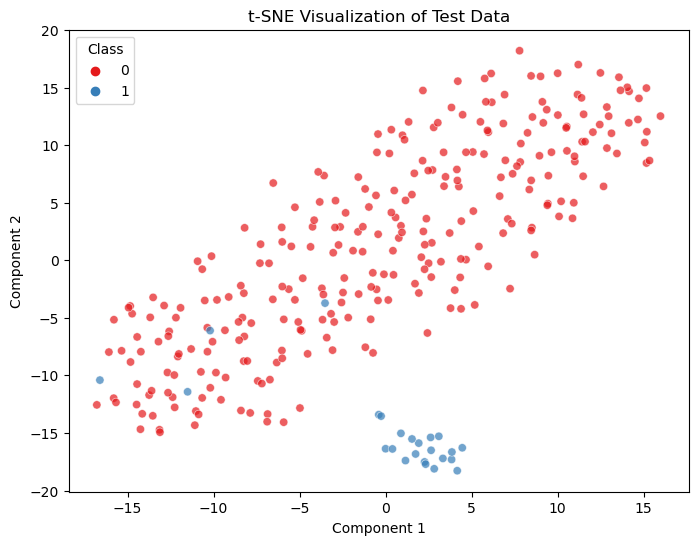

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,     # Number of samples
    n_features=20,      # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=10,     # Number of redundant features
    n_clusters_per_class=1,
    weights=[0.9, 0.1], # Skew the dataset to make it imbalanced (e.g., 10% abnormal data)
    flip_y=0,           # No label noise
    random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 2. Feature Importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10  # Number of top features to display

plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
sns.barplot(x=indices[:top_n], y=importances[indices[:top_n]])
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 4. t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_embedded = tsne.fit_transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test_embedded[:, 0],
    y=X_test_embedded[:, 1],
    hue=y_test,
    palette='Set1',
    alpha=0.7
)
plt.title('t-SNE Visualization of Test Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class', loc='best')
plt.show()
